In [1]:
from sklearn.datasets import fetch_openml
mnist=fetch_openml('mnist_784')

In [2]:
from sklearn.model_selection import train_test_split
from numpy.random import randint
indices_random=randint(70000,size=5000)
xtrain, xtest, ytrain, ytest = train_test_split(mnist.data[indices_random], mnist.target[indices_random], train_size=0.7)

Kernel: poly


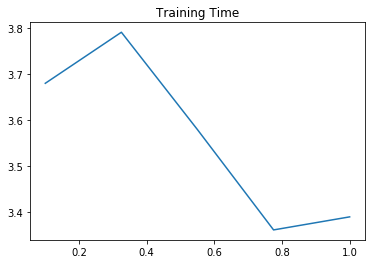

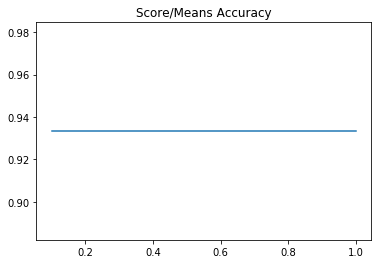

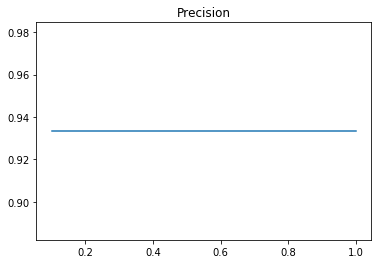

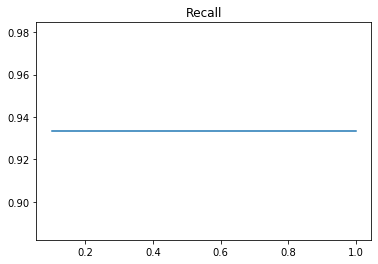

Kernel: rbf


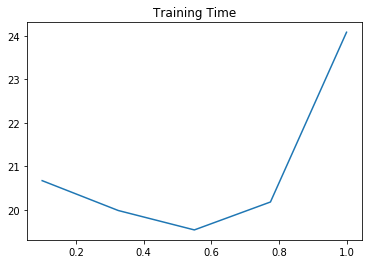

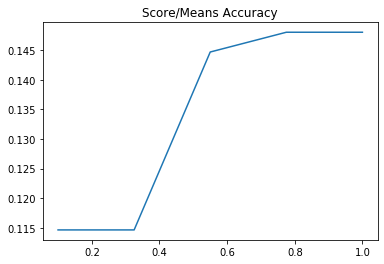

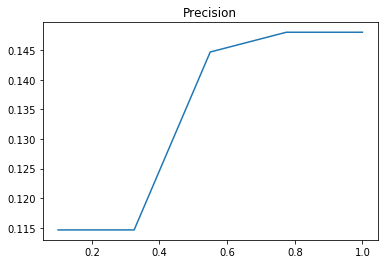

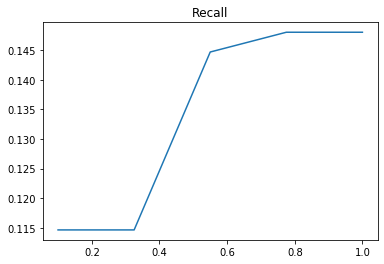

Kernel: sigmoid


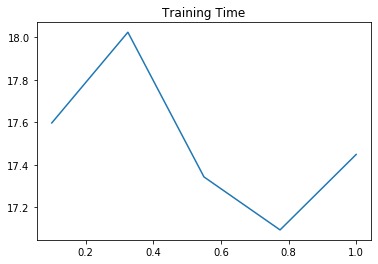

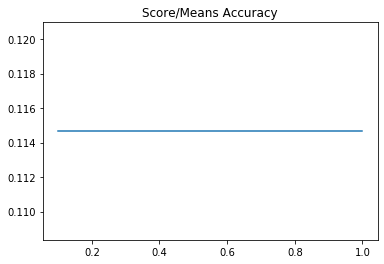

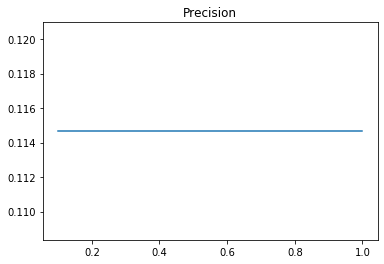

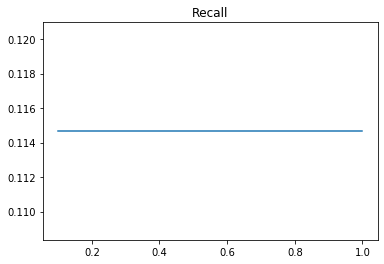

Kernel: precomputed


ValueError: X.shape[0] should be equal to X.shape[1]

In [3]:
from sklearn import svm 
from numpy import linspace
import matplotlib.pyplot as plt 
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from time import time
%matplotlib inline 

kernels=["poly", "rbf","sigmoid","precomputed"]
costs=linspace(0.1,1,5)

for kernel in kernels:
    print(f"Kernel: {kernel}")
    times,testprecs,testrecs,scores=[],[],[],[]
    for cost in costs:  
        tps1=time()
        clf=svm.SVC(kernel=kernel,C=cost,gamma="auto").fit(xtrain,ytrain)
        tps2=time()
        times.append(tps2-tps1)
        ypred=clf.predict(xtest)
        scores.append(clf.score(xtest,ytest))
        testrecs.append(recall_score(ytest,ypred,average="micro"))
        testprecs.append(precision_score(ytest,ypred,average="micro"))
        
    plt.plot(costs,times)
    plt.title("Training Time")
    plt.show()
    
    plt.plot(costs,scores)
    plt.title("Score/Means Accuracy")
    plt.show()
    
    plt.plot(costs,testprecs)
    plt.title("Precision")
    plt.show()
    
    plt.plot(costs,testrecs)
    plt.title("Recall")
    plt.show()